<a href="https://colab.research.google.com/github/Darvikkk/Netflix-Data-Analysis/blob/main/Project2_Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [ ]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9799 non-null   object 
 1   Title              9798 non-null   object 
 2   Overview           9798 non-null   object 
 3   Popularity         9798 non-null   float64
 4   Vote_Count         9798 non-null   float64
 5   Vote_Average       9798 non-null   float64
 6   Original_Language  9798 non-null   object 
 7   Genre              9798 non-null   object 
 8   Poster_Url         9798 non-null   object 
dtypes: float64(3), object(6)
memory usage: 689.1+ KB


In [ ]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9798.000000,9798.000000,9798.000000
mean,40.405882,1395.870280,6.439294
std,109.025122,2614.386446,1.130236
min,13.378000,0.000000,0.000000
25%,16.148000,146.000000,5.900000
50%,21.236500,445.000000,6.500000
75%,35.244250,1381.750000,7.100000
max,5083.954000,31077.000000,10.000000


In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

print(df['Release_Date'].dtypes)
print(f"Number of NaT values introduced: {df['Release_Date'].isnull().sum()}")

datetime64[ns]
Number of NaT values introduced: 1


In [ ]:
df.dropna(subset=['Release_Date'], inplace=True)
df['Release_Date'] = pd.to_datetime(df['Release_Date']).dt.year

Dropping the columns

In [ ]:
df.drop(cols_to_drop, axis=1, inplace=True)
display(df.columns)

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Original_Language', 'Genre'],
      dtype='object')

In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,6.3,en,Thriller
3,2021,Encanto,2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War"


Categorize Vote_Average column

In [ ]:
def categorize_col(df, col, labels):
    edges = (df[col].describe()['min'] - 0.001,
            df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max'])
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

In [ ]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
cols_to_drop = ['Overview', 'Poster_Url']
df.drop(cols_to_drop, axis=1, inplace=True)

df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df.dropna(subset=['Release_Date'], inplace=True)
df['Release_Date'] = pd.to_datetime(df['Release_Date']).dt.year

labels = ['not_popular', 'below_avg', 'avg', 'above_avg', 'popular']
df = categorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

['popular', 'avg', 'above_avg', 'below_avg', 'not_popular']
Categories (5, object): ['not_popular' < 'below_avg' < 'avg' < 'above_avg' < 'popular']

In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,popular,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151.0,popular,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122.0,avg,en,Thriller
3,2021-11-24,Encanto,2402.201,5076.0,popular,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793.0,above_avg,en,"Action, Adventure, Thriller, War"


In [ ]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
below_avg,2459
popular,2442
above_avg,2403
avg,2394
not_popular,100


In [ ]:
df.dropna(inplace=True)

df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0


In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,popular,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151.0,popular,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122.0,avg,en,Thriller
3,2021-11-24,Encanto,2402.201,5076.0,popular,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793.0,above_avg,en,"Action, Adventure, Thriller, War"


In [ ]:
print(df['Genre'].dtypes)
df['Genre'] = df['Genre'].astype(str).str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

object


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151.0,popular,en,Crime
4,2022,The Batman,3827.658,1151.0,popular,en,Mystery


In [ ]:
#casting columns into categegory

In [ ]:
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25720 entries, 0 to 25719
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release_Date       25720 non-null  int32   
 1   Title              25720 non-null  object  
 2   Popularity         25720 non-null  float64 
 3   Vote_Count         25720 non-null  float64 
 4   Vote_Average       25720 non-null  category
 5   Original_Language  25720 non-null  object  
 6   Genre              25720 non-null  category
dtypes: category(2), float64(2), int32(1), object(2)
memory usage: 955.5+ KB


In [ ]:
df.nunique()

,0
Release_Date,102
Title,9485
Popularity,8144
Vote_Count,3264
Vote_Average,5
Original_Language,43
Genre,19


In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151.0,popular,en,Crime
4,2022,The Batman,3827.658,1151.0,popular,en,Mystery


**Data Visualization**

In [ ]:
sns.set_style('whitegrid')

# **Most frequent Genre**

In [ ]:
df['Genre'].describe()

,Genre
count,25720
unique,19
top,Drama
freq,3728


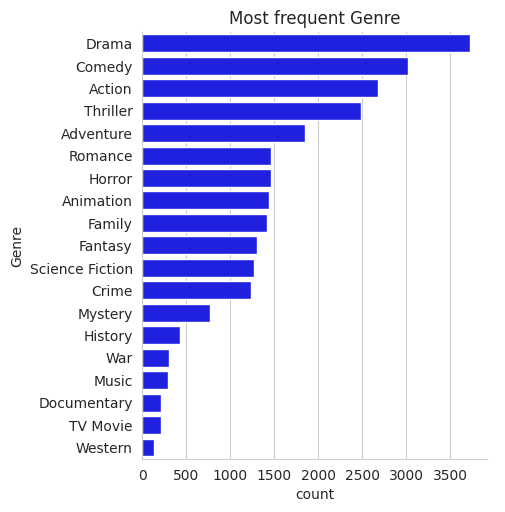

In [ ]:
sns.catplot(y = 'Genre', kind = 'count', data = df, order=df['Genre'].value_counts().index, color= 'blue')
plt.title('Most frequent Genre')
plt.show()

# **Highest Votes**


In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151.0,popular,en,Crime
4,2022,The Batman,3827.658,1151.0,popular,en,Mystery


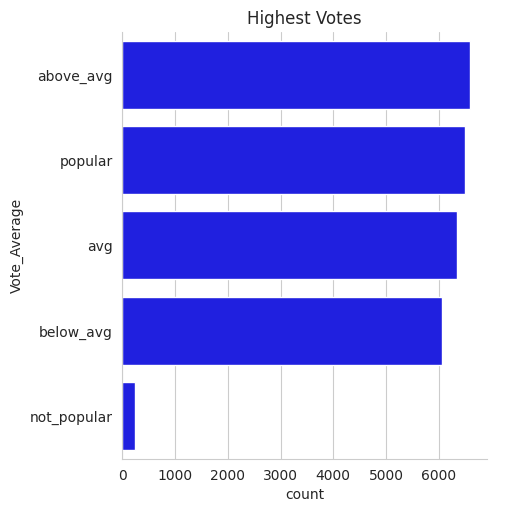

In [ ]:
sns.catplot(y = 'Vote_Average', kind = 'count', data = df, order=df['Vote_Average'].value_counts().index, color= 'blue')
plt.title('Highest Votes')
plt.show()

# **Most popular movie and its Genre**

In [ ]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Adventure


In [ ]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,en,Science Fiction


# **Lowest popular movie and its Genre**

In [ ]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
25713,2017,Our Souls at Night,13.378,357.0,above_avg,en,Romance
25714,2017,Our Souls at Night,13.378,357.0,above_avg,en,Drama
25715,2013,In Secret,13.378,151.0,avg,en,Drama
25716,2013,In Secret,13.378,151.0,avg,en,Thriller
25717,2013,In Secret,13.378,151.0,avg,en,Crime
25718,2007,The Deaths of Ian Stone,13.378,232.0,below_avg,en,Horror
25719,2007,The Deaths of Ian Stone,13.378,232.0,below_avg,en,Thriller


# **Year with most released movies**

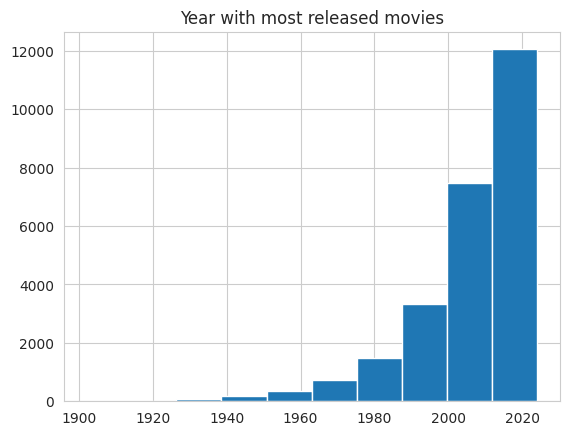

In [ ]:
df['Release_Date'].hist()
plt.title('Year with most released movies')
plt.show()

SUMMARY:

1)what is most frequent genre in the dataset? Drama genre is the most frequent genre in our dataset and appeared for more than 14% of the times among 19 other genres.

2)what genres has highest votes? we have 25.5% of our dataset with popular vote (6520 rows). drama again gains popularity among fans by being having more tan 18.5% of movie popularities.

3)what movie got highest popularity? what genre? Spider-man : no wy home has highest popularity rate in our dataset and it has genres of action, adventure and science fiction.

4)what movie for lowest popularity? what genre? The united states, thread' has the highest low rate in our dataset

5)which year has most filmmed movies? Year 2020